In [1]:
from pydub import AudioSegment
sound = AudioSegment.from_mp3("test.mp3")
sound.export("test.wav", format="wav")

<_io.BufferedRandom name='test.wav'>

In [2]:
import numpy as np
import scipy.fftpack as fft
import scipy.io.wavfile as wav
import os
import matplotlib.pyplot as plt
def dct_1d(signal):
    return fft.dct(signal, norm='ortho')
def idct_1d(signal):
    return fft.idct(signal, norm='ortho')
def compress_audio(signal, num_coeff):
    compressed = dct_1d(signal)
    compressed[num_coeff:] = 0
    return compressed
def decompress_audio(signal):
    return idct_1d(signal)

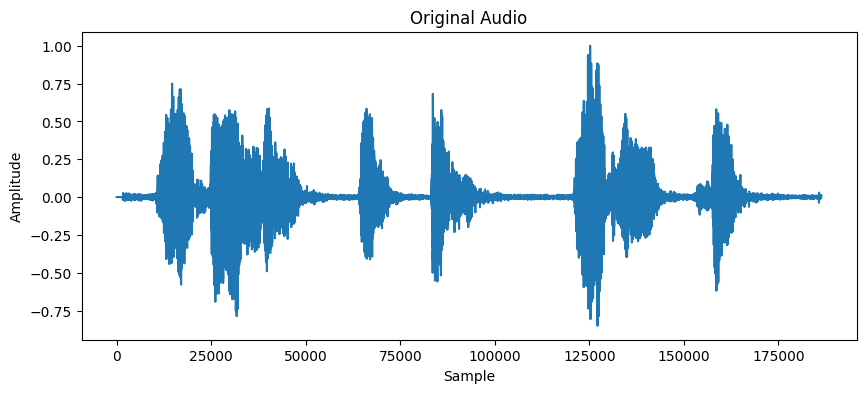

In [3]:
sample_rate, audio_data = wav.read('test.wav')
if len(audio_data.shape) > 1:
    audio_data = np.mean(audio_data, axis=1)
audio_data = audio_data.astype(np.float32) / np.max(np.abs(audio_data))
plt.figure(figsize=(10, 4))
plt.title('Original Audio')
plt.plot(audio_data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


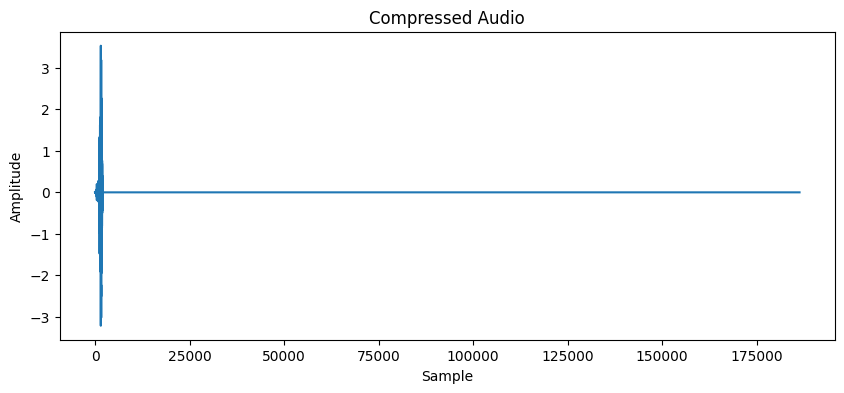

In [4]:
compressed_audio = compress_audio(audio_data, num_coeff=2000)
plt.figure(figsize=(10, 4))
plt.title('Compressed Audio')
plt.plot(compressed_audio)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

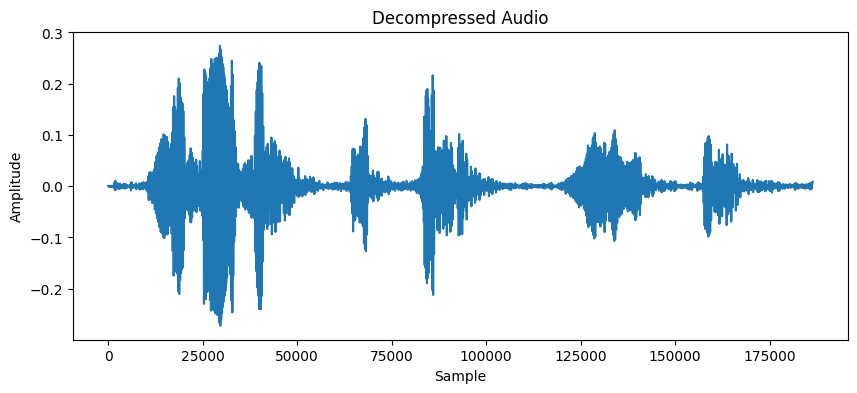

Original file size: 372780
compressed file size: 102861


In [5]:
decompressed_audio = decompress_audio(compressed_audio)
plt.figure(figsize=(10, 4))
plt.title('Decompressed Audio')
plt.plot(decompressed_audio)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

print("Original file size:",os.path.getsize(r'C:\Users\HP\Dropbox\PC\Desktop\ITC\test.wav'))
print("compressed file size:",os.path.getsize(r'C:\Users\HP\Dropbox\PC\Desktop\ITC\test_result.mp3'))


wav.write('test_result.wav', sample_rate, decompressed_audio.astype(np.int16))

In [6]:
from pydub import AudioSegment
from scipy.io import wavfile
import numpy as np
def normalize_audio(audio_data):
    normalized_data = audio_data / np.max(np.abs(audio_data))
    return normalized_data
decompressed_audio = decompress_audio(compressed_audio)
normalized_audio = normalize_audio(decompressed_audio)
scaled_audio = np.int16(normalized_audio * 32767)
wavfile.write('test_result.wav', sample_rate, scaled_audio)


In [7]:
from pydub import AudioSegment
def wav_to_mp3(wav_file, mp3_file, bitrate='192k'):
    audio = AudioSegment.from_wav(wav_file)
    audio.export(mp3_file, format='mp3', bitrate=bitrate)
wav_file_path = 'test_result.wav'
mp3_file_path = 'test_result.mp3'
wav_to_mp3(wav_file_path, mp3_file_path)
print("Original file size:",os.path.getsize(r'C:\Users\HP\Dropbox\PC\Desktop\ITC\test.wav'))
print("compressed file size:",os.path.getsize(r'C:\Users\HP\Dropbox\PC\Desktop\ITC\test_result.mp3'))
print("decompressed file",os.path.getsize(r'C:\Users\HP\Dropbox\PC\Desktop\ITC\test_result.wav'))


Original file size: 372780
compressed file size: 102861
decompressed file 372780


In [8]:
#### Lempel-Ziv-Welch (LZW) Encoding Method 

In [9]:
import lzma
import matplotlib.pyplot as plt
def compress_audio(input_file, output_file):
    with open(input_file, 'rb') as file_in, lzma.open(output_file, 'wb') as file_out:
        file_out.write(file_in.read())
def decompress_audio(input_file, output_file):
    with lzma.open(input_file, 'rb') as file_in, open(output_file, 'wb') as file_out:
        file_out.write(file_in.read())
input_audio = 'test.wav'

compressed_file = 'compressed.lzma'
decompressed_audio = 'output_audio.wav'
compress_audio(input_audio, compressed_file)
print("Audio compressed successfully.")
decomp=decompress_audio(compressed_file, decompressed_audio)
print("Audio decompressed successfully.")

print("\n")
print("original audio size:",os.path.getsize(r'C:\Users\HP\Dropbox\PC\Desktop\ITC\test.wav'))
print("compresssed audio size:",os.path.getsize(r'C:\Users\HP\Dropbox\PC\Desktop\ITC\compressed.lzma'))
print("compresssed bin size:",os.path.getsize(r'C:\Users\HP\Dropbox\PC\Desktop\ITC\compressed_audio.bin'))
print("decompresssed audio size:",os.path.getsize(r'C:\Users\HP\Dropbox\PC\Desktop\ITC\output_audio.wav'))






Audio compressed successfully.
Audio decompressed successfully.


original audio size: 372780
compresssed audio size: 267388
compresssed bin size: 130676
decompresssed audio size: 372780
